In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/gardasnagarjun/Downloads/crypto-markets.csv')

In [3]:
df.tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1622.0,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1823.0,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1913.0,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1788.0,0.4421,3124.52
942296,project-x,NANOX,Project-X,2018-11-30,1727,22872.09,23086.98,19040.91,21136.72,125.0,1654.0,0.5180,4046.07


# Part 1: Preliminary Data Exploration and Data Wrangling:


In [4]:
sym=df["symbol"]
print(sym.describe())

count     942297
unique      2005
top         BITS
freq        3189
Name: symbol, dtype: object


In [5]:
print(df.columns.values)

['slug' 'symbol' 'name' 'date' 'ranknow' 'open' 'high' 'low' 'close'
 'volume' 'market' 'close_ratio' 'spread']


In [6]:
print(df['date'].head())
print(df['date'].describe())

0    2013-04-28
1    2013-04-29
2    2013-04-30
3    2013-05-01
4    2013-05-02
Name: date, dtype: object
count         942297
unique          2043
top       2018-11-28
freq            2071
Name: date, dtype: object


In [7]:
BTC=df[df.symbol=='BTC']
display(BTC.describe())

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,2042.0,2042.000000,2042.000000,2042.000000,2042.000000,2.042000e+03,2.042000e+03,2042.000000,2042.000000
mean,1.0,2285.455421,2354.447723,2207.495544,2287.287272,1.450143e+09,3.785297e+10,0.541097,146.952179
std,0.0,3438.652272,3563.970934,3285.670083,3438.366702,3.042556e+09,5.853611e+10,0.299901,355.994292
min,1.0,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.784112e+08,0.000000,0.000000
25%,1.0,320.590000,329.070000,313.412500,321.135000,1.868702e+07,4.386274e+09,0.280050,7.245000
50%,1.0,598.015000,607.365000,587.275000,598.140000,5.814580e+07,8.154787e+09,0.559250,19.480000
75%,1.0,2607.887500,2749.390000,2536.247500,2608.680000,1.206027e+09,4.284981e+10,0.808700,117.482500
max,1.0,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.265025e+11,1.000000,4110.400000


# Part 2: A little more of Exploratory Data Analysis:

In [8]:
BTC_date=BTC['date']
BTC_volume=BTC['volume']
BTC_close=BTC['close']

BTC_date.values
BTC_close_by_date=pd.Series(BTC_close.values,index=BTC_date.values)
BTC_volume_by_date=pd.Series(BTC_volume.values,index=BTC_date.values)

In [9]:
BTC_plot=pd.DataFrame(BTC_close_by_date,columns=['BTC_close'])
start_date=BTC_plot.index.values[0]
obs=BTC_plot.index.nunique()
rng=pd.PeriodIndex(start=start_date,freq='D',periods=obs)

/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  after removing the cwd from sys.path.


In [10]:
%matplotlib inline
import seaborn as sns;sns.set()

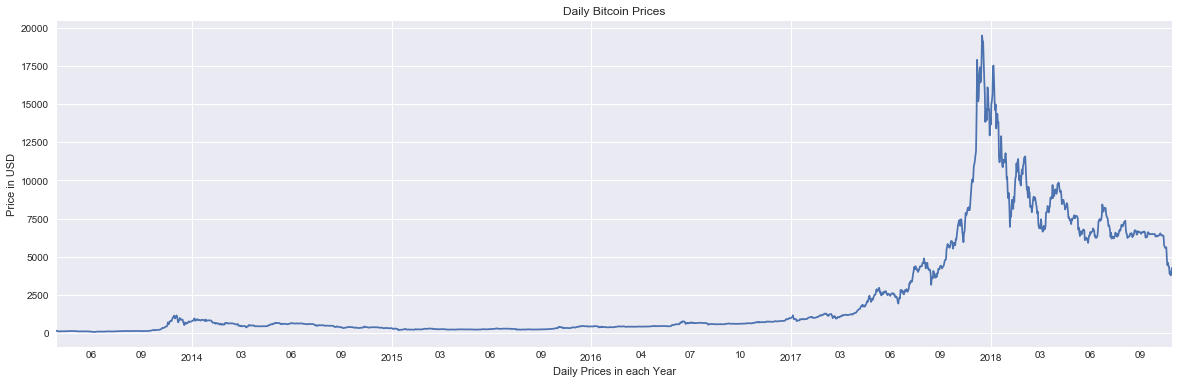

In [11]:
#plotting the BTC_plot:
BTC_plot.index=pd.to_datetime(BTC_plot.index.values)
ax=BTC_plot['BTC_close'].plot(title='Daily Bitcoin Prices',figsize=(20,6))
ax.set_xlabel('Daily Prices in each Year')
ax.set_ylabel('Price in USD');
ax.xaxis.set_minor_formatter(mp.dates.DateFormatter('%m'))

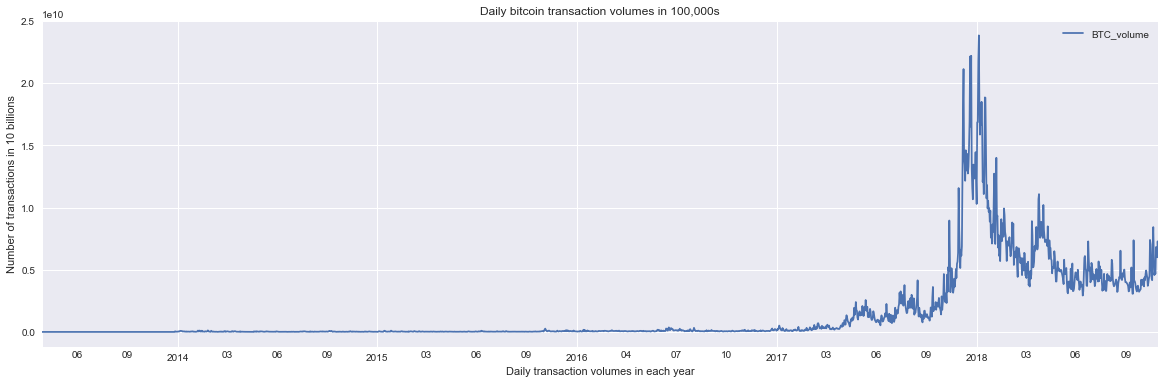

In [12]:
#BTC volume plot:
BTC_volume_plot = pd.DataFrame(BTC_volume_by_date, columns=['BTC_volume'])
BTC_volume_plot.index = pd.to_datetime(BTC_volume_plot.index.values)
ax = BTC_volume_plot.plot(figsize = (20,6), title = 'Daily bitcoin transaction volumes in 100,000s')
ax.set_xlabel('Daily transaction volumes in each year')
ax.set_ylabel('Number of transactions in 10 billions');
ax.xaxis.set_minor_formatter(mp.dates.DateFormatter('%m'))

## Monthly distribution of BTC across different years:

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun'),
 Text(0,0,'Jul'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct'),
 Text(0,0,'Nov'),
 Text(0,0,'Dec')]

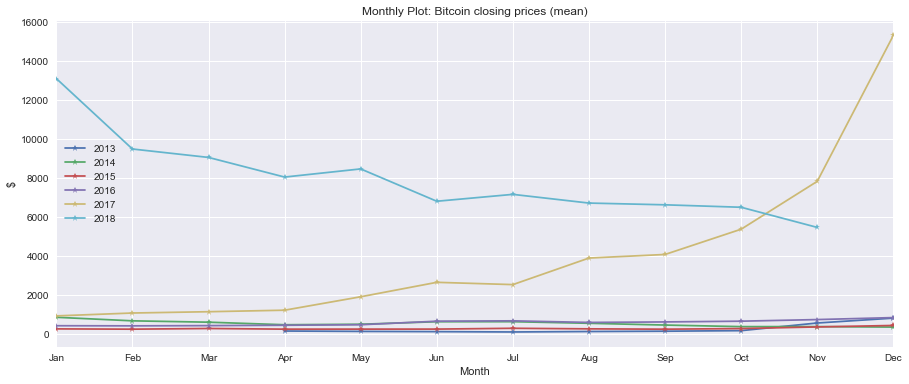

In [13]:
#Monthly distribution of BTC across different years:
BTC_pv=pd.pivot_table(BTC_plot,index=BTC_plot.index.month,columns=BTC_plot.index.year,values='BTC_close',aggfunc='mean')
BTC_pv.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

ax=BTC_pv.plot(title="Monthly Plot: Bitcoin closing prices (mean)",figsize=(15,6),marker='*')

ax.set_xlabel('Month')
ax.set_ylabel('$')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(BTC_pv.index)



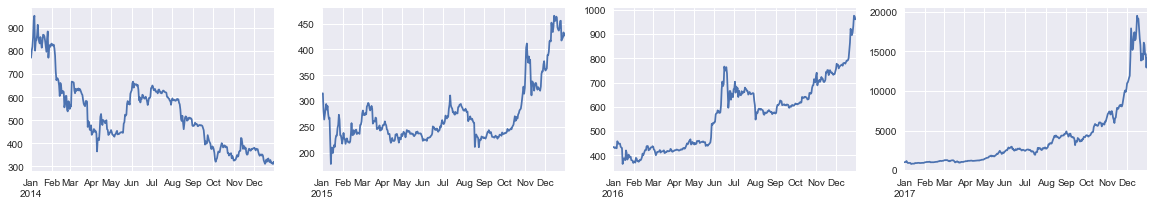

In [14]:
#Zooming yearly trends instead of just a macro level:
fig=plt.figure(figsize=[20,3])
#subplots:
ax1 = plt.subplot2grid((1,4), (0,0))
ax2 = plt.subplot2grid((1,4), (0,1))
ax3 = plt.subplot2grid((1,4), (0,2))
ax4 = plt.subplot2grid((1,4), (0,3))
arr_ax = [ax1,ax2, ax3, ax4]
for i in range(2014,2018):
    BTC_plot[str(i)].BTC_close.plot(ax=arr_ax[i-2014])

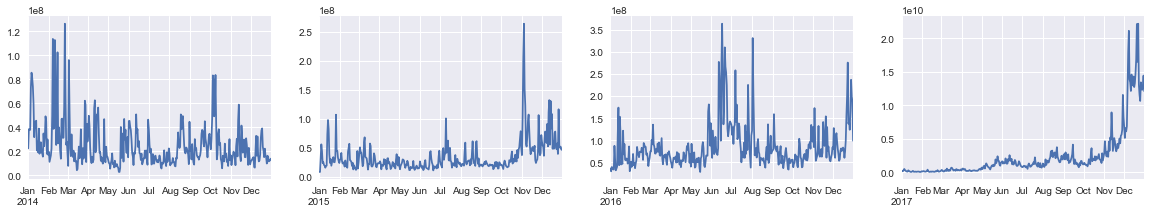

In [15]:
BTC_scatter=pd.DataFrame(BTC_plot)
BTC_scatter['BTC_volume']=BTC_volume_plot['BTC_volume']

fig=plt.figure(figsize=[20,3]);
#subplots:
ax1 = plt.subplot2grid((1,4), (0,0))
ax2 = plt.subplot2grid((1,4), (0,1))
ax3 = plt.subplot2grid((1,4), (0,2))
ax4 = plt.subplot2grid((1,4), (0,3))
arr_ax = [ax1,ax2, ax3, ax4]
for i in range(2014,2018):
    BTC_plot[str(i)].BTC_volume.plot(ax=arr_ax[i-2014])

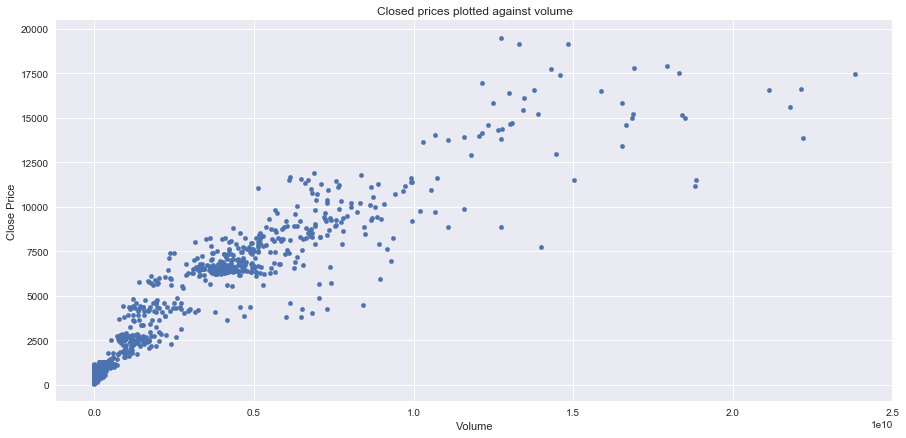

In [16]:
#Scatterplot of BTC Prices and Volumes:
ax=BTC_scatter.plot.scatter(y='BTC_close',
                            x='BTC_volume',
                            alpha=1.0,
                            figsize=(15,7),
                            title='Closed prices plotted against volume')
ax.set_xlabel('Volume')
ax.set_ylabel('Close Price');

In [17]:
#let's find the correlation coefficient: High value is good
BTC_scatter['BTC_close'].corr(BTC_scatter['BTC_volume'])

0.9411032886082875

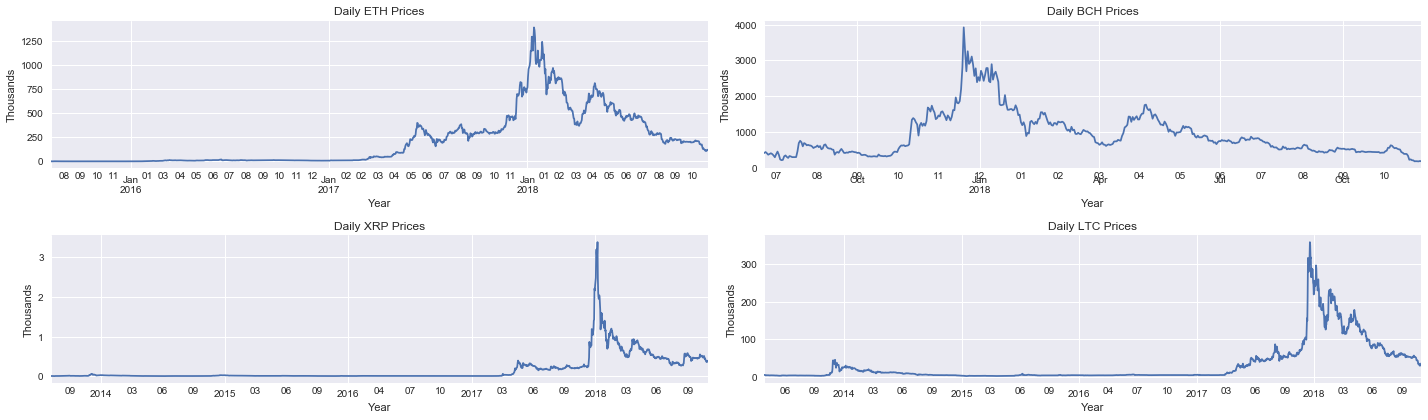

In [18]:
#Plot the top 5 Cryptocurrencies by market cap:
def crypto_plot(crypto,ax):
    BTC=df[df.symbol==crypto]
    BTC_date=BTC['date']
    BTC_close=BTC['close']
    BTC_volume=BTC['volume']
    
    BTC_close_by_date=pd.Series(BTC_close.values,index=BTC_date.values)
    BTC_volume_by_date=pd.Series(BTC_volume.values,index=BTC_date.values)
    
    BTC_plot=pd.DataFrame(BTC_close_by_date,columns=['BTC_close'])
    
    BTC_plot.index=pd.to_datetime(BTC_plot.index.values)
    ax=BTC_plot['BTC_close'].plot(title=str('Daily '+ crypto + ' Prices'),
                                 figsize=(20,6),ax=ax)
    ax.set_xlabel('Year')
    ax.set_ylabel('Thousands')
    
    ax.xaxis.set_minor_formatter(mp.dates.DateFormatter('%m'))
    
    
fig=plt.figure(figsize=[20,6]);
#subplots:
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0))
ax4 = plt.subplot2grid((2,2), (1,1))
arr_ax = [ax1,ax2, ax3, ax4]

cry_arr=["ETH","BCH","XRP","LTC"]
for i in range(0,len(arr_ax)):
    crypto_plot(cry_arr[i],arr_ax[i])
    
fig.tight_layout()

/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Number of Crypto Currencies')

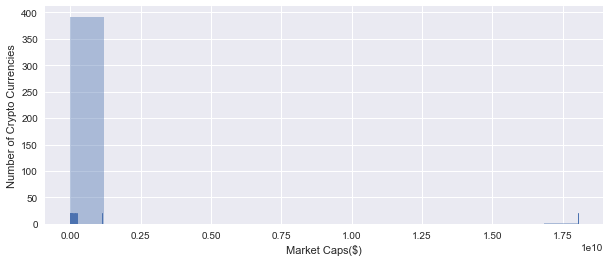

In [19]:
#Histogram plot y market value of all cryptos:

#Date select:

fig=plt.figure(figsize=[10,4])
#Take any date with respect to 2018, kaggle dataset:
curr_date="2017-02-21"
df_mcap=df[df.date==curr_date]
ax=sns.distplot(df_mcap.market,hist=True, rug=True, kde=False, bins=15)
ax.set_xlabel("Market Caps($)");
ax.set_ylabel("Number of Crypto Currencies")

## Histogram plot by market value of top 20 cryptos:

These top 20 cryptos account for 97.35% of the total market value of ALL cryptos


1395     86.870482
3339      1.040233
4550      5.435138
6128      0.067179
9182      0.908825
10551     0.120111
12650     0.828578
15378     0.727899
16717     0.274129
18022     0.029266
18881     0.533110
19643     0.102937
22792     0.108637
26482     0.032431
27450     0.065146
29512     0.046046
31269     0.009107
34336     0.047826
35803     0.106301
37736     0.001374
Name: marketshare, dtype: float64

/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Number of Crypto Currencies')

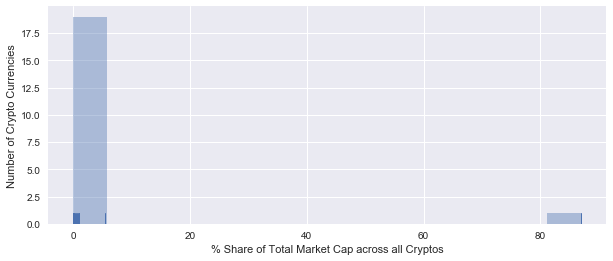

In [20]:
# Top 20 Cryptos by market value:
fig=plt.figure(figsize=[10,4]);

df_mcap_by_name=pd.DataFrame(df_mcap,columns={'slug','market','name'})
df_mcap_by_name['marketshare']=df_mcap_by_name['market']*100/df_mcap_by_name.market.sum()
subtotal=df_mcap_by_name.market.head(20).sum()*100/df_mcap_by_name.market.sum()
print("These top 20 cryptos account for " + str(round(subtotal,2)) + "% of the total market value of ALL cryptos")
display(df_mcap_by_name.marketshare.head(20))
ax = sns.distplot(df_mcap_by_name.marketshare.head(20), hist = True, rug=True, kde=False, bins=15)
ax.set_xlabel("% Share of Total Market Cap across all Cryptos")
ax.set_ylabel("Number of Crypto Currencies")

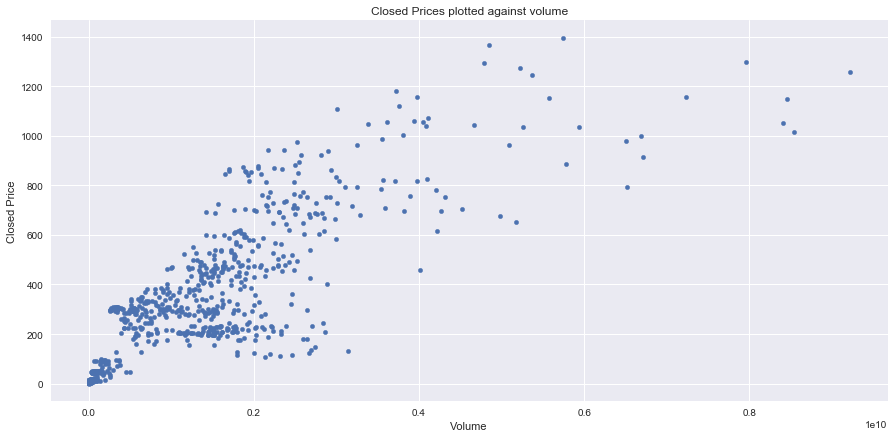

In [21]:
#Scatterplot of Price vs Volume for ETH:
ETH=df[df.symbol=='ETH']
ETH=ETH.set_index(ETH['date'])
ax=ETH.plot.scatter(y='close',
                   x='volume',
                   alpha=1.0,
                   figsize=(15,7),
                   title='Closed Prices plotted against volume')
ax.set_xlabel('Volume')
ax.set_ylabel('Closed Price');

In [22]:
ETH['close'].corr(ETH['volume'])

0.8765293217701307

In [23]:
ETH['close'].corr(BTC_scatter['BTC_volume']) # Curious whether any other price has some inference on the volume part of BTC

0.8625507253590313

## Modelling of BTC prices using different forecasting techniques:


### 1. Using linear regression to predict prices based on volume (based on a single predictor):

,BTC_close,BTC_volume
count,365.000000,3.650000e+02
mean,4006.033616,2.382867e+09
std,4053.192214,3.786476e+09
min,777.760000,6.085170e+07
25%,1187.870000,3.326030e+08
50%,2589.410000,1.182870e+09
75%,4578.770000,2.219410e+09
max,19497.400000,2.219800e+10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BTC_prices   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2373.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          2.69e-161
Time:                        13:22:00   Log-Likelihood:                -3180.9
No. Observations:                 365   AIC:                             6366.
Df Residuals:                     363   BIC:                             6374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1630.5250     91.461     17.828      0.000    1450.666    1810.384
BTC_volumes  9.969e-07   2.05e-08     48.717      0.000    9.57e-07    1.04e-06
==============================================================================
Omnibus:                       84.082   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.479
Skew:                          -0.605   Prob(JB):                    3.19e-193
Kurtosis:                      10.538   Cond. No.                     5.28e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

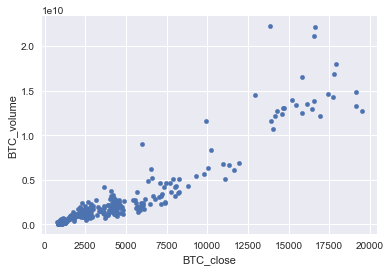

In [24]:
import statsmodels.formula.api as sm
BTC_training = BTC_scatter['2017']
BTC_validation = BTC_scatter[ (BTC_scatter.index >= '01-01-2015') & (BTC_scatter.index <= '31-12-2015') ]

#btc_training['log_volumes'] = 

#eth_training = eth[ (eth.index >= '01-01-2017') & (eth.index <= '31-12-2017') ]

display(BTC_training.describe())
BTC_prices = BTC_training['BTC_close']
BTC_volumes = BTC_training['BTC_volume']
result = sm.ols(formula="BTC_prices ~ BTC_volumes", data=BTC_training.shift(1)).fit()
display( result.summary())
BTC_training.plot.scatter(x='BTC_close', y='BTC_volume')

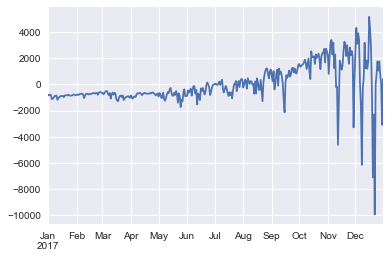

In [25]:
result.resid.plot()

/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


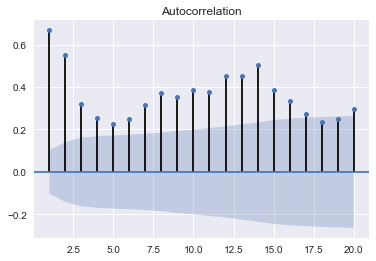

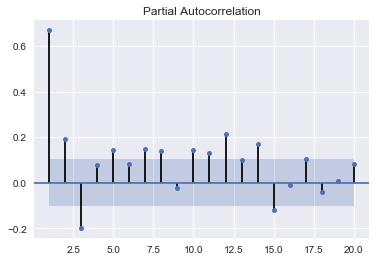

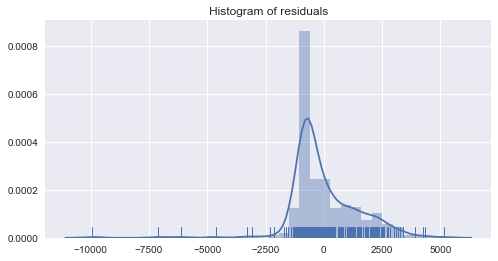

In [26]:
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf
x = plot_acf(result.resid, lags=20, zero=False)
x = plot_pacf(result.resid, zero=False, lags=20)
ax = plt.figure(figsize=(8,4))
sns.distplot(result.resid, kde=True, rug=True, ax=ax.figure).set_title('Histogram of residuals');

# Linear Regression based on multiple prices:

In [28]:
BTC_training = BTC_scatter['2017']
BTC_validation = BTC_scatter[ (BTC_scatter.index >= '01-01-2015') & (BTC_scatter.index <= '31-12-2015') ]

ETH = df[df.symbol=='ETH']
ETH = ETH.set_index(ETH['date'])

XRP = df[df.symbol=='XRP']
XRP = XRP.set_index(XRP['date'])

LTC= df[df.symbol=='LTC']
LTC = LTC.set_index(LTC['date'])

#btc_training['log_volumes'] = 

#eth_training = eth[ (eth.index >= '01-01-2017') & (eth.index <= '31-12-2017') ]

#print(btc_training.describe())
ETH.index = pd.to_datetime(ETH.index.values)
LTC.index = pd.to_datetime(LTC.index.values)
XRP.index = pd.to_datetime(XRP.index.values)

ETH_prices = ETH['2017']['close'].shift(1)
XRP_prices = XRP['2017']['close'].shift(1)
LTC_prices = LTC['2017']['close'].shift(1)
  
result = sm.ols(formula="BTC_prices ~ ETH_prices + XRP_prices + LTC_prices", data=BTC_training).fit()
display( result.summary())
#btc_training.plot.scatter(x='btc_close', y='btc_volume')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BTC_prices   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     758.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          3.32e-155
Time:                        13:22:52   Log-Likelihood:                -3177.7
No. Observations:                 364   AIC:                             6363.
Df Residuals:                     360   BIC:                             6379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    418.8307    133.425      3.139      0.002     156.440     681.222
ETH_prices     9.3141      0.965      9.654      0.000       7.417      11.211
XRP_prices -3670.1032    551.079     -6.660      0.000   -4753.842   -2586.364
LTC_prices    45.4327      2.885     15.750      0.000      39.760      51.105
==============================================================================
Omnibus:                      176.459   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1493.633
Skew:                           1.845   Prob(JB):                         0.00
Kurtosis:                      12.213   Cond. No.                     2.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

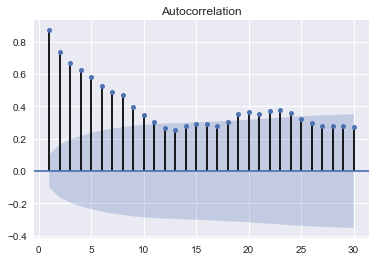

In [29]:
x = plot_acf(result.resid, zero=False, lags=30)  

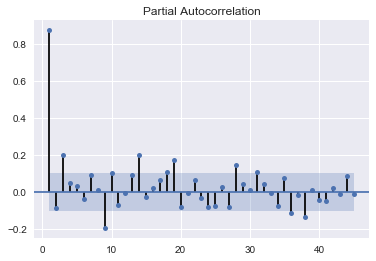

In [30]:
x = plot_pacf(result.resid, zero=False, lags=45)


/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


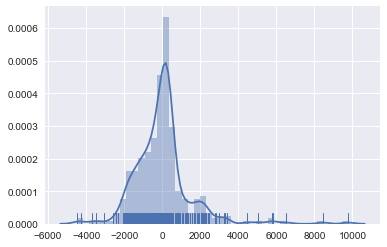

In [31]:
sns.distplot(result.resid, kde=True, rug=True, hist = True)


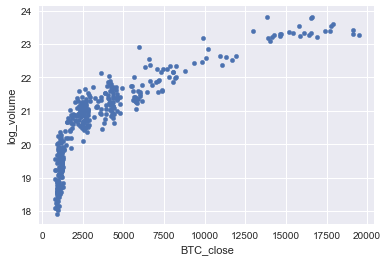

In [32]:
# Examining Auto-correlation within BTC Prices:
BTC_scatter
BTC_scatter['log_volume'] = (BTC_scatter['BTC_volume'].apply(np.log))
BTC_scatter['2017'].plot.scatter(x='BTC_close', y='log_volume')

## Calculating 1 order differentials in the BTC time series:

In [33]:
BTC_shift = BTC_scatter.shift(1)

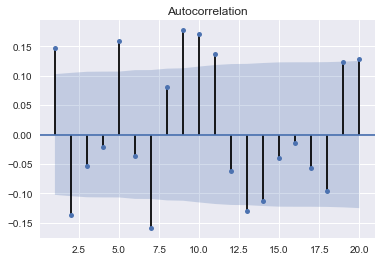

In [34]:
BTC_diff = BTC_scatter - BTC_shift
x = plot_acf(BTC_diff['2017']['BTC_close'], lags=20, zero = False)

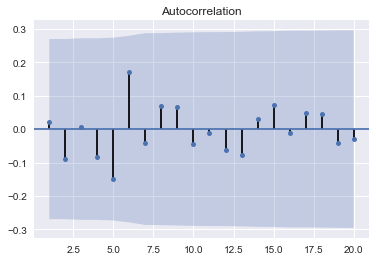

In [35]:
BTC_diff_weekly = BTC_diff.resample("W").mean()
x = plot_acf(BTC_diff_weekly['2017']['BTC_close'], lags=20, zero = False)

/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


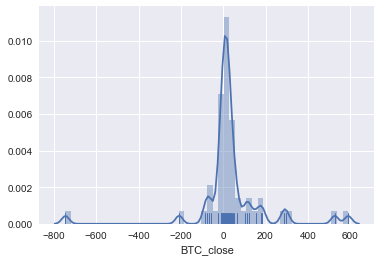

In [36]:
sns.distplot(BTC_diff_weekly['2017']['BTC_close'], kde=True, rug=True, hist = True)

### Trend & Seasonality Forecasting:

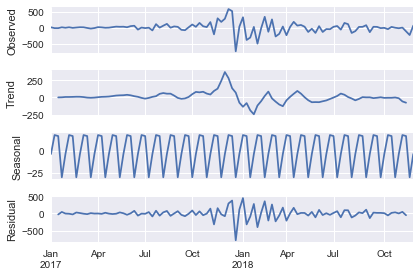

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
res_diff = sm.tsa.seasonal_decompose(BTC_diff_weekly['2017':]['BTC_close'], freq=4, model='additive')
x = res_diff.plot()

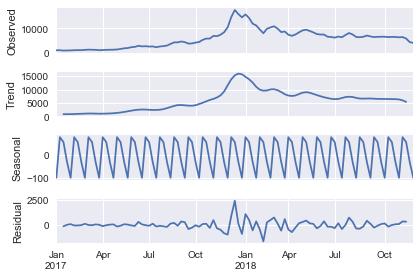

In [38]:
BTC_weekly = BTC_scatter.resample('W').mean()
# decompose time series into components
res = sm.tsa.seasonal_decompose(BTC_weekly['2017':]['BTC_close'], freq=4, model='additive')
x = res.plot()

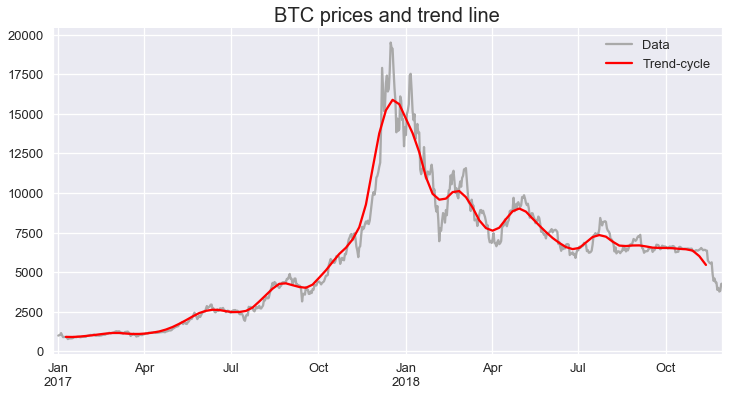

In [39]:
sns.set_context("talk")
sns.set_style('darkgrid') 
%matplotlib inline
from IPython.display import display, HTML, Javascript
from matplotlib.pyplot import xlabel, ylabel, title, legend

# plot original data
ax = BTC_scatter['2017':]['BTC_close'].plot(color="darkgrey", figsize=(12,6))
# plot trend component
res.trend.plot(ax=ax, color="red")
# formatting
title("BTC prices and trend line",fontsize=20)
#ylabel("Prices in $")
ax.legend(['Data', 'Trend-cycle']);
#plt.close()

### Portmanteau Test for Auto-correlation:

In [40]:
from statsmodels.stats.diagnostic import acorr_ljungbox
h = 10
# calculate Ljung-Box and Box-Pierce test
lbvalue, lbpvalue, bpvalue, bppvalue = acorr_ljungbox(BTC_weekly['2017'].BTC_close.dropna(), lags=h,  boxpierce=True)
lbvalue[h-1], lbpvalue[h-1]
# display Ljung-Box test stats
df = pd.DataFrame(columns=['X-squared','p-value'], index = range(1))
df['X-squared'] = lbvalue[h-1]; df['p-value'] = lbpvalue[h-1];
display("Ljung-Box values before applying weekly differencing")
df

'Ljung-Box values before applying weekly differencing'

,X-squared,p-value
0,148.105487,9.141719e-27


In [41]:
h = 10
# calculate Ljung-Box and Box-Pierce test
lbvalue, lbpvalue, bpvalue, bppvalue = acorr_ljungbox(BTC_diff_weekly['2017'].BTC_close.dropna(), lags=h,  boxpierce=True)
lbvalue[h-1], lbpvalue[h-1]
# display Ljung-Box test stats
df = pd.DataFrame(columns=['X-squared','p-value'], index = range(1))
df['X-squared'] = lbvalue[h-1]; df['p-value'] = lbpvalue[h-1];
display("Ljung-Box values after applying weekly differencing")
df

'Ljung-Box values after applying weekly differencing'

,X-squared,p-value
0,4.900053,0.897754


# Forecasting with SES:

In [42]:
# Training (in-sample) accuracy
def accuracy(y_cap, y, y_train, is_ts=True, is_seasonal=True):
    e = y - y_cap
    ME = e.mean()
    RMSE = (e**2.).mean()**0.5
    MAE  = e.abs().mean()
    MAPE = (100.*e/y).abs().mean()
    freq = pd.infer_freq(y_train.index)
    display("Frequency of training data set is " + freq)
    q = e/((y_train-y_train.shift({'W':7,'D':1}[freq])).abs()).mean() if is_ts and is_seasonal else \
        e/((y_train-y_train.shift(1)).abs()).mean() if is_ts else \
        e/((y_train-y_train.mean()).abs()).mean()
    MASE = q.abs().mean()
    return ME, RMSE, MAE, MAPE, MASE

In [43]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

BTC_training = BTC_scatter['01-04-2017':'30-09-2017']

# fit simple exponential smoothing model
fit3 = SimpleExpSmoothing(BTC_training.BTC_close).fit()

# also obtain other fit with Holt's method which extends SES with a trend function

# display forecast accuracy measures
results = pd.DataFrame(columns = ['ME','RMSE','MAE','MAPE','MASE'])
results.loc['results'] = accuracy(fit3.fittedvalues, BTC_training.BTC_close, BTC_training.BTC_close)

/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


'Frequency of training data set is D'

In [44]:
display(results)

,ME,RMSE,MAE,MAPE,MASE
results,12.709334,120.629551,74.041884,3.205215,0.995875


In [45]:
display("Forecast values: " + str(fit3.fcastvalues))

'Forecast values: [4326.00910973]'

In [46]:
fit3.fittedvalues.median()


1864.210401709876

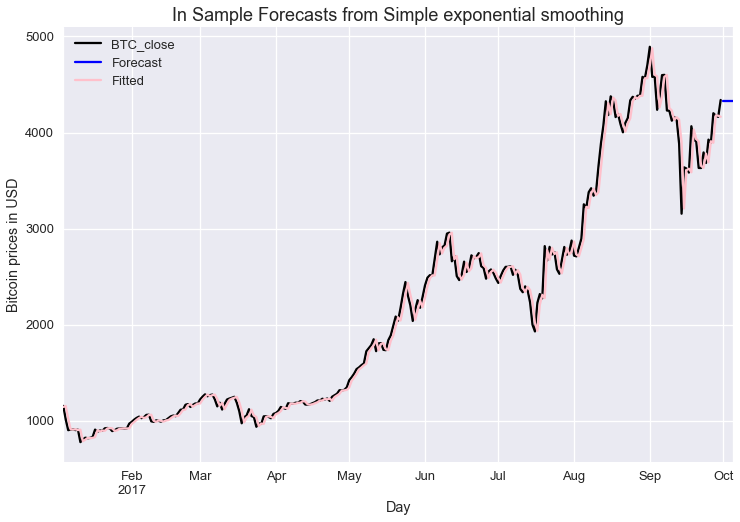

In [49]:
# plot original data
ax = BTC_training.BTC_close.plot(color='black', figsize=(12,8))
# simple exponential smoothing plot
fit3.forecast(5).rename('Forecast').plot( ax=ax, color='blue', legend=True)
fit3.fittedvalues.plot( ax=ax, color='pink', label = 'Fitted')
# plot formatting
ax.set_xlabel('Day')
ax.set_ylabel('Bitcoin prices in USD')
ax.set_title('In Sample Forecasts from Simple exponential smoothing', fontsize = 18)
ax.legend(loc = 'upper left')
#plt.close()

In [50]:
#Validation dataset: Q4 of 2017 year (BTC):
BTC_validation = BTC_scatter['2017-10-01':'2017-12-31']

In [52]:
BTC_validation.loc[:,"BTC_close_ycap_SES"] = [float(fit3.fcastvalues) for i in range(len(BTC_validation))]

display(BTC_validation.tail())

/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,BTC_close,BTC_volume,log_volume,BTC_close_ycap_SES
2017-12-27,15838.5,1.248760e+10,23.248002,4326.00911
2017-12-28,14606.5,1.233650e+10,23.235828,4326.00911
2017-12-29,14656.2,1.302550e+10,23.290175,4326.00911
2017-12-30,12952.2,1.445260e+10,23.394140,4326.00911
2017-12-31,14156.4,1.213630e+10,23.219467,4326.00911


In [53]:
# testing accuracy (out-of-sample)
def test_accuracy(y_cap, y, is_ts=True, is_seasonal=True):
    e = y - y_cap
    ME = e.mean()
    RMSE = (e**2.).mean()**0.5
    MAE  = e.abs().mean()
    return ME, RMSE, MAE,

In [54]:
results = pd.DataFrame(columns = ['ME','RMSE','MAE'])
results.loc['results-SES'] = test_accuracy(BTC_validation.BTC_close_ycap_SES, BTC_validation.BTC_close)

In [55]:
display(results)


,ME,RMSE,MAE
results-SES,5181.367086,6877.078738,5183.653569


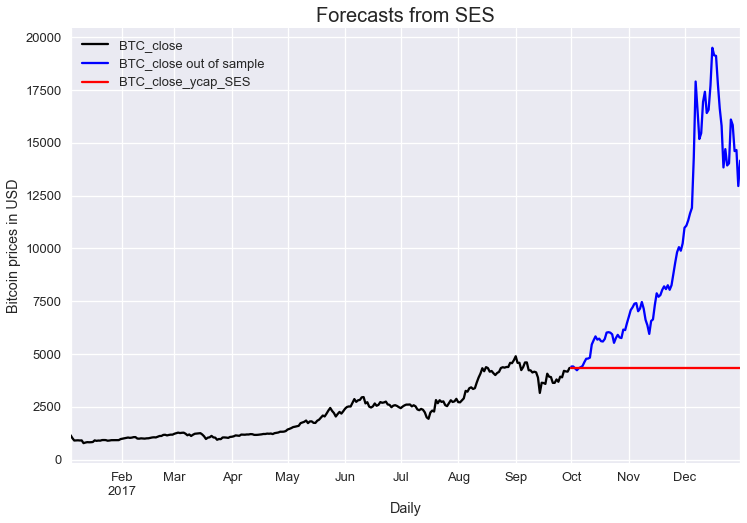

In [56]:
# plot
ax = BTC_training.BTC_close.plot(color="black", figsize=(12,8), legend = True)
BTC_validation.BTC_close.plot(ax=ax, color='blue', legend=True, label="BTC_close out of sample")
BTC_validation.BTC_close_ycap_SES.plot(ax=ax, color = 'red', legend = True)
# plot formatting
ax.set_title("Forecasts from SES", fontsize = 20)
xlabel("Daily"); ylabel("Bitcoin prices in USD");

### Holt's Linear Method (SES method with trend function):

In [57]:
fit4 = Holt(BTC_training.BTC_close, exponential=True).fit(optimized=True)

/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [58]:
fcast4 = fit4.forecast(92) # 92 days in the validation set from 01-Sep-2017 to 31-Dec-2017
display(fcast4.tail())

2017-12-27    6337.716463
2017-12-28    6365.285364
2017-12-29    6392.974189
2017-12-30    6420.783459
2017-12-31    6448.713699
Freq: D, dtype: float64

In [59]:
BTC_validation.loc[:,"BTC_close_ycap_SES_Holt_Trend"] = fcast4.values

results.loc['results-SES_Holt_Trend'] = test_accuracy(BTC_validation.BTC_close_ycap_SES_Holt_Trend, BTC_validation.BTC_close)

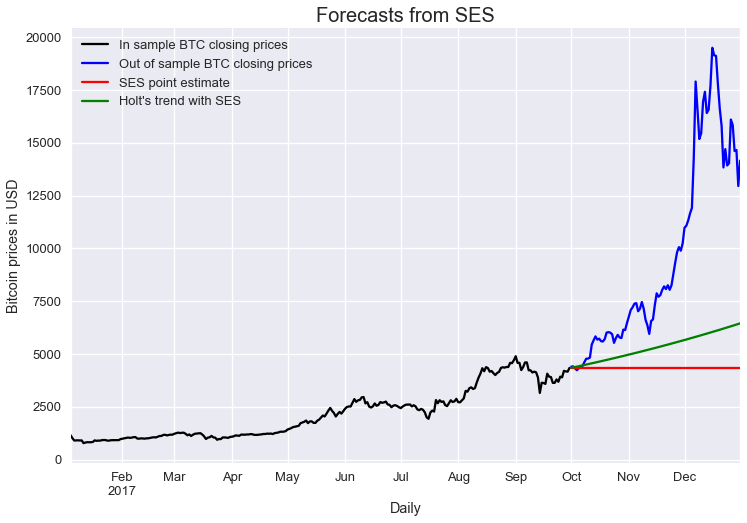

In [60]:
# plot
ax = BTC_training.BTC_close.plot(color="black", figsize=(12,8), legend = True, label="In sample BTC closing prices")
BTC_validation.BTC_close.plot(ax=ax, color='blue', legend=True, label="Out of sample BTC closing prices")
BTC_validation.BTC_close_ycap_SES.plot(ax=ax, color = 'red', legend = True, label ='SES point estimate')
fcast4.plot(ax=ax, color = 'green', legend = True, label='Holt\'s trend with SES')
# plot formatting
ax.set_title("Forecasts from SES", fontsize = 20)
xlabel("Daily"); ylabel("Bitcoin prices in USD");

/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


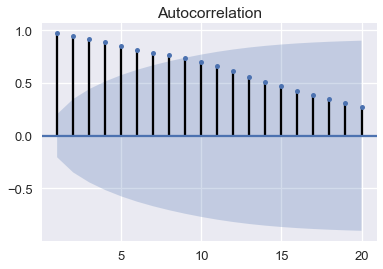

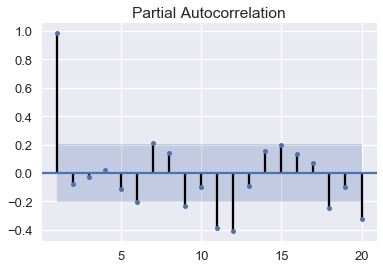

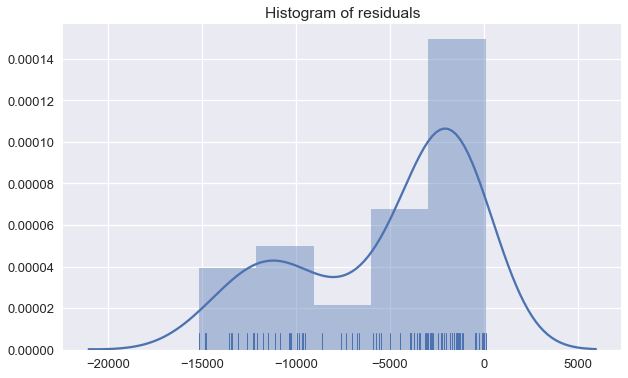

In [62]:
#Residual analysis of holt's linear method(Daily price)
residuals_SES = BTC_validation.BTC_close_ycap_SES - BTC_validation.BTC_close
x = plot_acf(residuals_SES, zero=False, lags=20)
x = plot_pacf(residuals_SES, zero=False, lags=20)
ax = plt.figure(figsize=(10,6))
sns.distplot(residuals_SES, kde=True, rug=True, ax=ax.figure).set_title('Histogram of residuals');

In [63]:
residuals_SES.mean()

-5181.367085925722

### SES Holt Trent method with weekly prices & monthly prices:

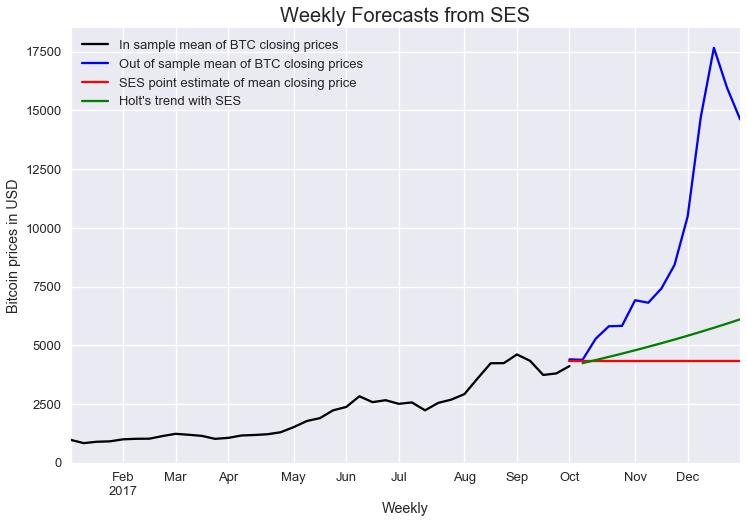

In [65]:
BTC_weekly_training = BTC_training.resample('W').mean()
BTC_weekly_validation = BTC_validation.resample('W').mean()

fit4 = Holt(BTC_weekly_training.BTC_close, exponential=True, damped=False).fit(optimized=True)

fcast4 = fit4.forecast(13) # 13 weeks in the validation set from 01-Sep-2017 to 31-Dec-2017
fcast4
# plot
ax = BTC_weekly_training.BTC_close.plot(color="black", figsize=(12,8), legend = True, label="In sample mean of BTC closing prices")
BTC_weekly_validation.BTC_close.plot(ax=ax, color='blue', legend=True, label="Out of sample mean of BTC closing prices")
BTC_weekly_validation.BTC_close_ycap_SES.plot(ax=ax, color = 'red', legend = True, label ='SES point estimate of mean closing price')
fcast4.plot(ax=ax, color = 'green', legend = True, label='Holt\'s trend with SES')
# plot formatting
ax.set_title("Weekly Forecasts from SES", fontsize = 20)
xlabel("Weekly"); ylabel("Bitcoin prices in USD");

/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


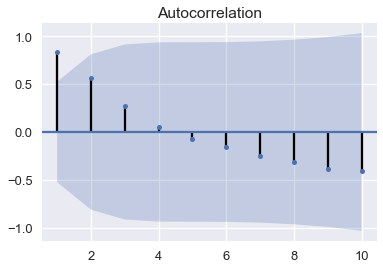

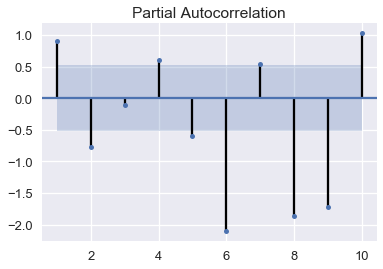

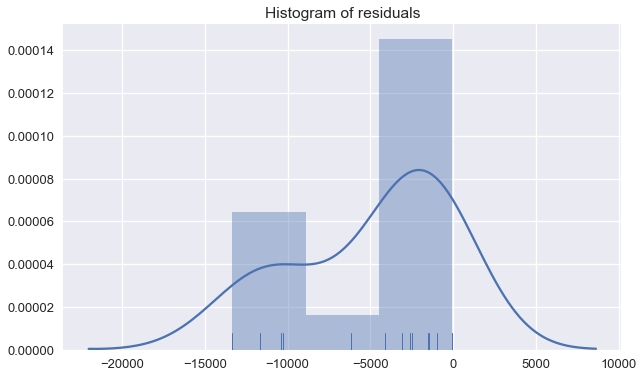

In [66]:
#Residual analysis of Holt's linear method(Weekly prices):

residuals_SES = BTC_weekly_validation.BTC_close_ycap_SES - BTC_weekly_validation.BTC_close
x = plot_acf(residuals_SES, zero=False, lags=10)
x = plot_pacf(residuals_SES, zero=False, lags=10)
ax = plt.figure(figsize=(10,6))
sns.distplot(residuals_SES, kde=True, rug=True, ax=ax.figure).set_title('Histogram of residuals');

/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/holtwinters.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)
/Users/gardasnagarjun/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/holtwinters.py:70: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)


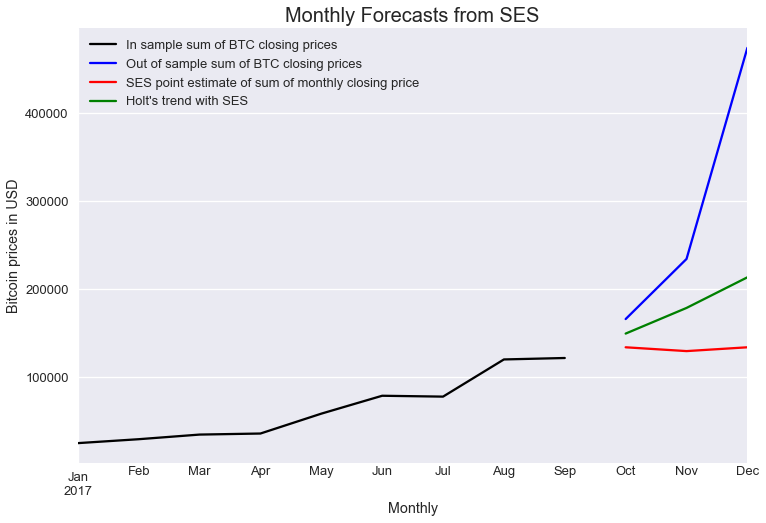

In [67]:
BTC_monthly_training = BTC_training.resample('M').sum()
BTC_monthly_validation = BTC_validation.resample('M').sum()

fit4 = Holt(BTC_monthly_training.BTC_close, exponential=True, damped=False).fit(optimized=True)

fcast4 = fit4.forecast(3) # 3 months in the validation set from 01-Sep-2017 to 31-Dec-2017
fcast4
# plot
ax = BTC_monthly_training.BTC_close.plot(color="black", figsize=(12,8), legend = True, label="In sample sum of BTC closing prices")
BTC_monthly_validation.BTC_close.plot(ax=ax, color='blue', legend=True, label="Out of sample sum of BTC closing prices")
BTC_monthly_validation.BTC_close_ycap_SES.plot(ax=ax, color = 'red', legend = True, label ='SES point estimate of sum of monthly closing price')
fcast4.plot(ax=ax, color = 'green', legend = True, label='Holt\'s trend with SES')
# plot formatting
ax.set_title("Monthly Forecasts from SES", fontsize = 20)
xlabel("Monthly"); ylabel("Bitcoin prices in USD");